In [25]:
from matplotlib.pyplot import imshow
from imageio.v2 import imread
from skimage import transform
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
def define_model():
    model = Sequential()
    model.add(Input(shape=(100, 100, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='RandomNormal',
                     padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='RandomNormal',
                     padding='same'))

    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='RandomNormal'))
    model.add(Dense(3, activation='softmax'))
# compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [27]:
model = define_model()

In [28]:
model = define_model()

In [29]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Prepare iterators
train_it = datagen.flow_from_directory(
    'dataset/train/',
    class_mode='categorical',
    batch_size=64,
    target_size=(100, 100)
)

test_it = datagen.flow_from_directory(
    'dataset/test/',
    class_mode='categorical',
    batch_size=64,
    target_size=(100, 100)
)

Found 104 images belonging to 3 classes.
Found 104 images belonging to 3 classes.


In [30]:
history = model.fit(train_it, validation_data=test_it, epochs=50, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5314 - loss: 1.2009 - val_accuracy: 0.5288 - val_loss: 0.8778
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5413 - loss: 0.8104 - val_accuracy: 0.5481 - val_loss: 0.5572
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5737 - loss: 0.5451 - val_accuracy: 0.5385 - val_loss: 0.5358
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.5361 - loss: 0.5335 - val_accuracy: 0.5385 - val_loss: 0.5286
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5413 - loss: 0.5261 - val_accuracy: 0.5385 - val_loss: 0.5135
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.5506 - loss: 0.5048 - val_accuracy: 0.5385 - val_loss: 0.4920
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5590 - loss: 0.4827 - val_accuracy: 0.5577 - val_loss: 0.4740
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5635 - loss: 0.4710 - val_accuracy: 0.5577 - val_loss: 0.4653
Epoch 9/50
2/2 ━

In [36]:
# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 77.885


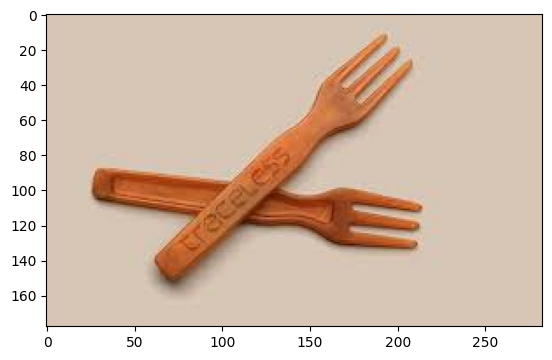

In [37]:
a = imread("testimage/imagef.jpg")
imshow(a)

In [38]:
# resizing image to networks input size
b = transform.resize(a, (100,100))

In [39]:
b.shape
b=b.reshape(1,100,100,3)

In [40]:
model.predict(b)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[6.4686741e-05, 4.6370471e-01, 5.3623056e-01]], dtype=float32)

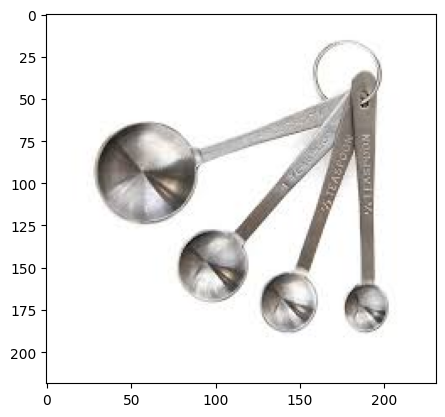

In [41]:
a = imread("./testimage/images.jpg")
imshow(a)

In [42]:
a = transform.resize(a, (100,100))
model.predict(a.reshape(1,100,100,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[8.4078974e-06, 6.2204868e-01, 3.7794298e-01]], dtype=float32)